In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']


In [2]:
tss_annotation = doc['tss_annotation']

In [3]:

import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from Modules.Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 16)


In [4]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [5]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)

In [6]:
meta_samples = pd.read_csv('Results/meta_samples.csv',index_col=0)
meta_samples = meta_samples.set_index('Full')
meta_samples.head()


,Experiment,Short,Short_with_number,Tissue
Full,,,,
/data/isshamie/TSS/Processed/BMDMwt/GRO/f04_peaks/merge_bg_2.peak,GRO,BMDMwt_GRO,BMDMwt_GRO1,BMDMwt
/data/isshamie/TSS/Processed/Brain/GRO/f04_peaks/merge_bg_2.peak,GRO,Brain_GRO,Brain_GRO1,Brain
/data/isshamie/TSS/Processed/Brain/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Brain_mSTART,Brain_mSTART1,Brain
/data/isshamie/TSS/Processed/Heart/mSTART/f04_peaks/merge_bg_2.peak,mSTART,Heart_mSTART,Heart_mSTART1,Heart
/data/isshamie/TSS/Processed/Kidney/GRO/f04_peaks/merge_bg_2.peak,GRO,Kidney_GRO,Kidney_GRO1,Kidney


In [7]:
txn_df = pickle.load(open('Results/txn_df_1kb_1kb.p','rb'))
gene_df = pickle.load(open('Results/gene_df_1kb_1kb.p','rb'))
gene_id_df = pickle.load(open('Results/gene_id_df.p','rb'))


In [8]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

('Percent of isoforms identified: ', 0.4422129739223397)
('Percent of genes identified: ', 0.8129421315087556)


('Number of genes with greater than 10 peaks:', 13)


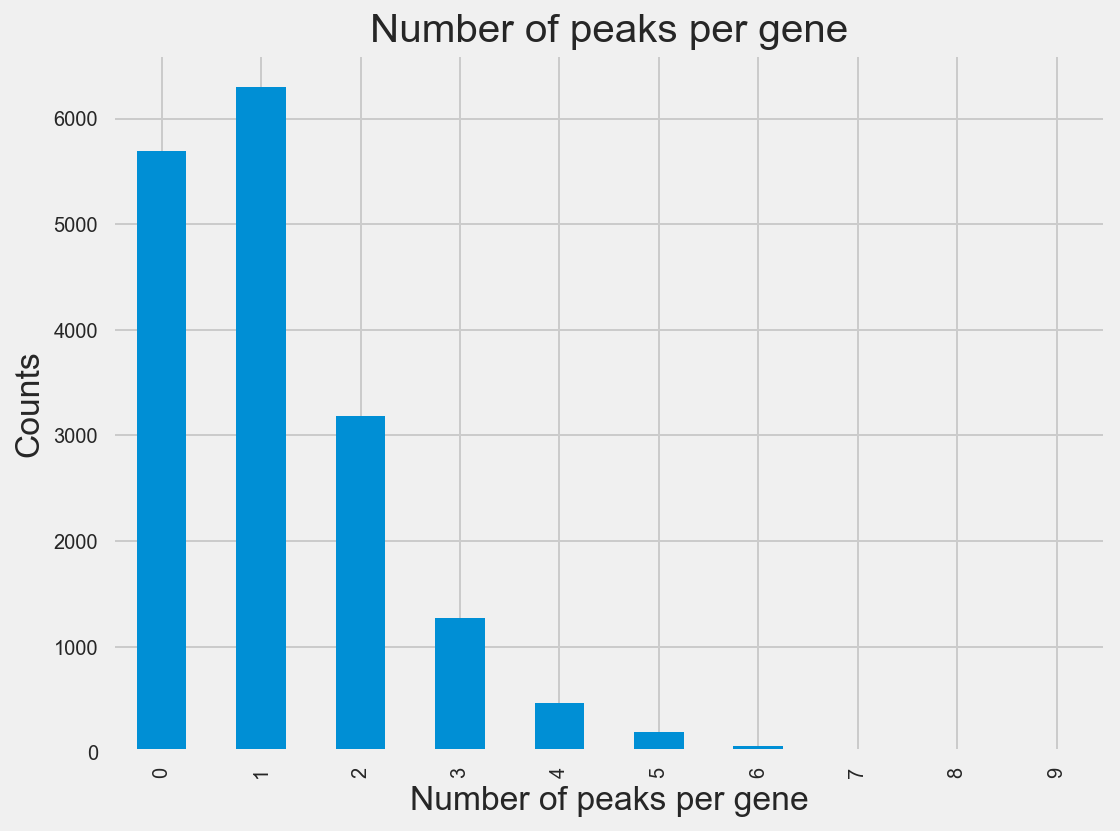

In [19]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure();
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);
gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar()
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene.png')

('Number of genes with greater than 10 peaks:', 1)


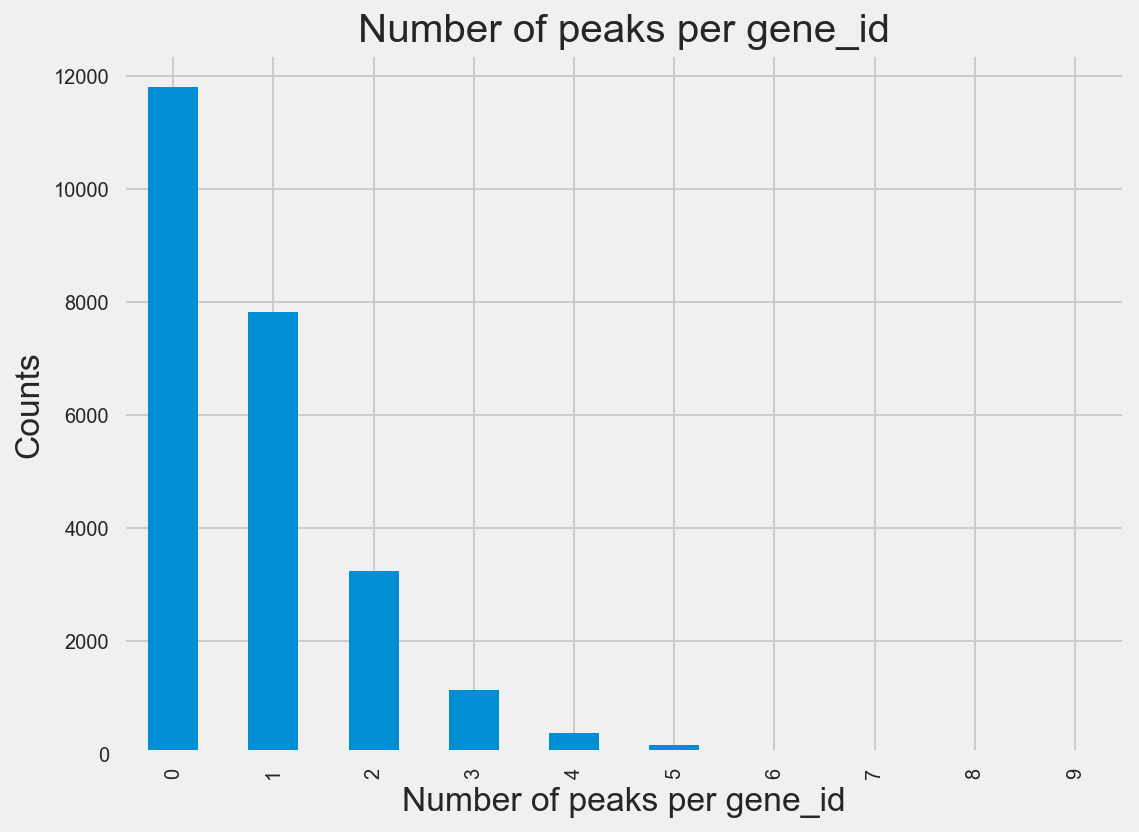

In [20]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure();
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar()
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id.png')

('Number of genes with greater than 10 peaks:', 0)


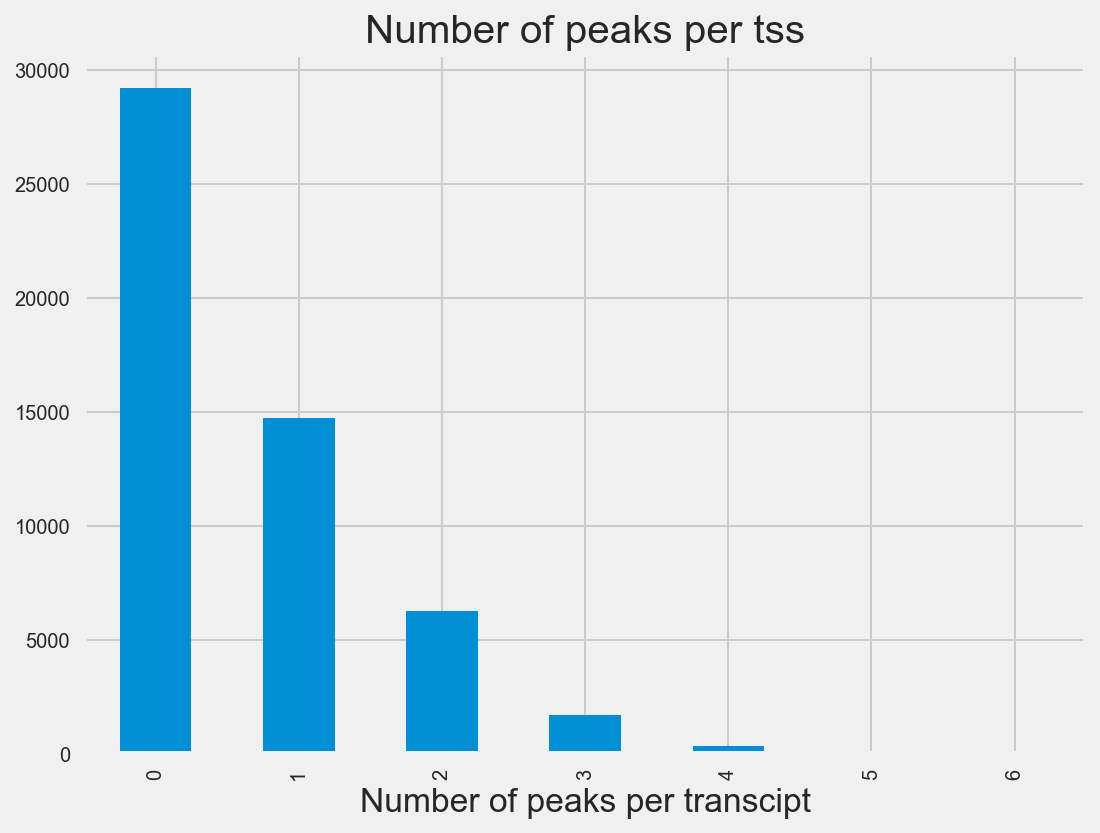

In [11]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure();
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar()
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn.png')

### Tissues overall gene expression

In [12]:
gene_df = pickle.load(open("Results/gene_df.p",'rb'))

In [13]:
np.sum(gene_df['hasGene'])

11555

In [14]:
gene_df.head()

,peaks,numberOfPeaks,peaksWithin_1kb_100bp,promoterPeaks,tissues,minDistance,minDistancePeak,maxValue,maxPeakId,maxTissues,Chr,Start,End,gene_id,gene,transcript,hasGene,Number of SS
SERHL,"[Merged-picr_74-10067746-3, Merged-picr_0-2095...",10,"[Merged-picr_74-10067746-3, Merged-picr_0-2095...","[Merged-picr_74-10067746-3, Merged-picr_0-2095...","[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",31,Merged-picr_0-20959-16,1666.35,Merged-picr_74-10067746-3,"[Heart_mSTART, Kidney_GRO, Kidney_mSTART]",picr_74,10067654,10067857,gene_26628_1,SERHL,asmbl_75212,True,2
RRP7A,"[Merged-picr_10-20507337-4, Merged-picr_0-4463...",26,"[Merged-picr_0-44638-7, Merged-picr_0-44487-4]",[Merged-picr_0-44487-4],"[Brain_GRO, Brain_mSTART, Spleen_mSTART, CHO_m...",26,Merged-picr_0-44487-4,10.105,Merged-picr_0-44487-4,"[Brain_GRO, Brain_mSTART, Spleen_mSTART, CHO_m...",picr_0,44409,44566,gene_2,RRP7A,asmbl_10,True,1
POLDIP3,"[Merged-picr_0-78615-14, Merged-picr_0-98815-1...",38,"[Merged-picr_0-78615-14, Merged-picr_0-98958-1...",[Merged-picr_0-78299-12],"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",-41,Merged-picr_0-78299-12,34.8,Merged-picr_0-78299-12,"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",picr_0,78177,78416,gene_3_1,POLDIP3,asmbl_19,True,1
CYB5R3,"[Merged-picr_0-94356-1, Merged-picr_0-92870-1,...",16,"[Merged-picr_0-92870-1, Merged-picr_0-92200-1,...","[Merged-picr_0-92200-1, Merged-picr_0-92664-2]","[BMDMwt_GRO, CHO_mSTART]",0,Merged-picr_0-92200-1,4.51,Merged-picr_0-92200-1,[BMDMwt_GRO],picr_0,92125,92275,gene_3_2,CYB5R3,asmbl_20,True,2
A4GALT,"[Merged-picr_0-185727-8, Merged-picr_0-185806-...",31,"[Merged-picr_0-185727-8, Merged-picr_0-185806-...","[Merged-picr_0-185727-8, Merged-picr_0-186292-5]","[BMDMwt_GRO, Brain_GRO, Heart_mSTART, Kidney_G...",5,Merged-picr_0-186292-5,30.75,Merged-picr_0-185727-8,"[BMDMwt_GRO, Brain_GRO, Heart_mSTART, Kidney_G...",picr_0,185649,185806,gene_4_3,A4GALT,asmbl_30,True,2


In [15]:
gene_tissue_matrix = pd.read_csv('Results/merged/genes_tissues.csv',index_col = 0)

In [16]:
## Remove genes with no expression in any tissues
short_gene_tissue = gene_tissue_matrix[~(np.sum(gene_tissue_matrix == 0,axis=1) == gene_tissue_matrix.shape[1])]
print(len(gene_tissue_matrix))
print(len(short_gene_tissue))


17246
11554


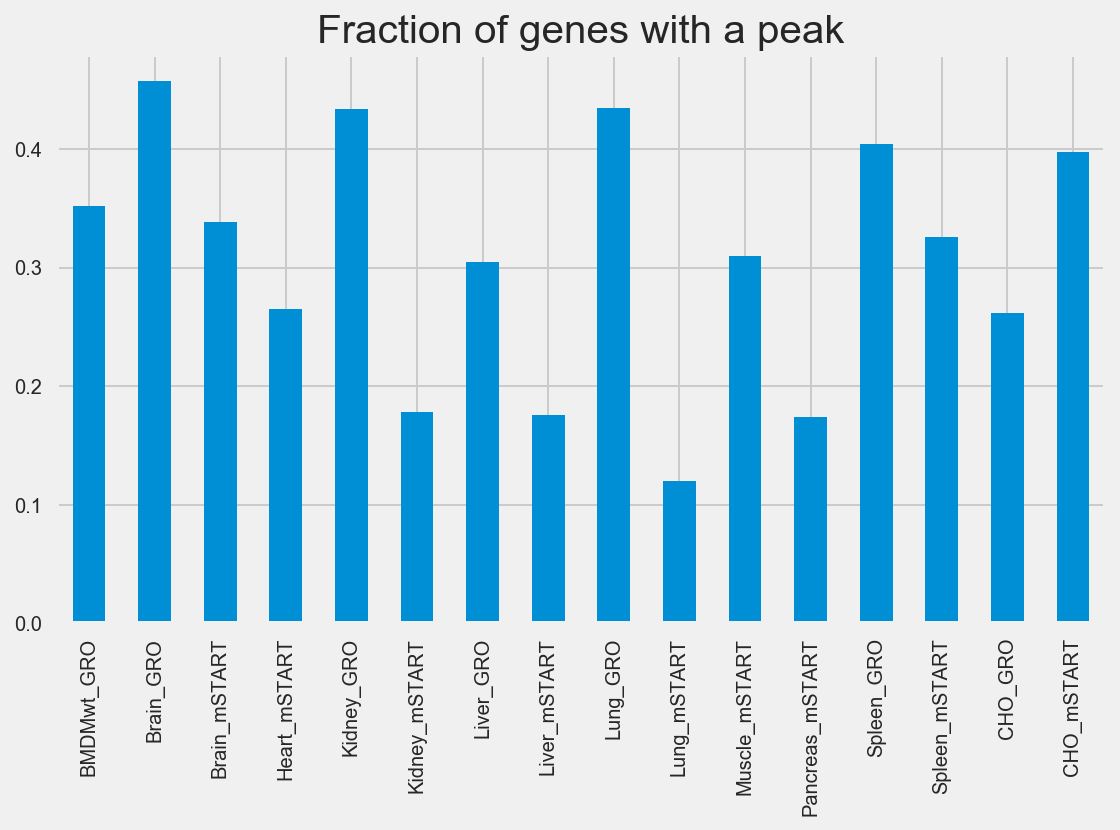

In [17]:
f = plt.figure()
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar()
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[short_gene_tissue.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes.png')